In [38]:
# Import necessary functions

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sns.set(font_scale = 1)

## DATA CLEANING

In [39]:
# Import main dataset as dataframe

df = pd.read_csv('Data/churn.csv')

In [40]:
# Taking a look at the first ten entries of the dataframe

df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [41]:
# Checking dataframe info for null values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [42]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Only 3 **area code** values across numerous states - something is off with this column so we'll drop it along with the **phone number** column.

In [43]:
# Dropping unnecessary columns and viewing results

df_clean = df.drop(columns=['area code', 'phone number'], axis=1)
df_clean

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [44]:
# Converting non-numeric values to integers

df_clean['international plan'].replace(['no','yes'], [0,1], inplace = True)
df_clean['voice mail plan'].replace(['no','yes'], [0,1], inplace = True)
df_clean['churn'].replace([False, True], [0,1], inplace = True)

In [45]:
# Checking conversion results

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

There are no null values and all columns (aside from **state**) are now numeric. Good!

In [46]:
df_clean['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [47]:
# Viewing summary statistics

df_clean.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


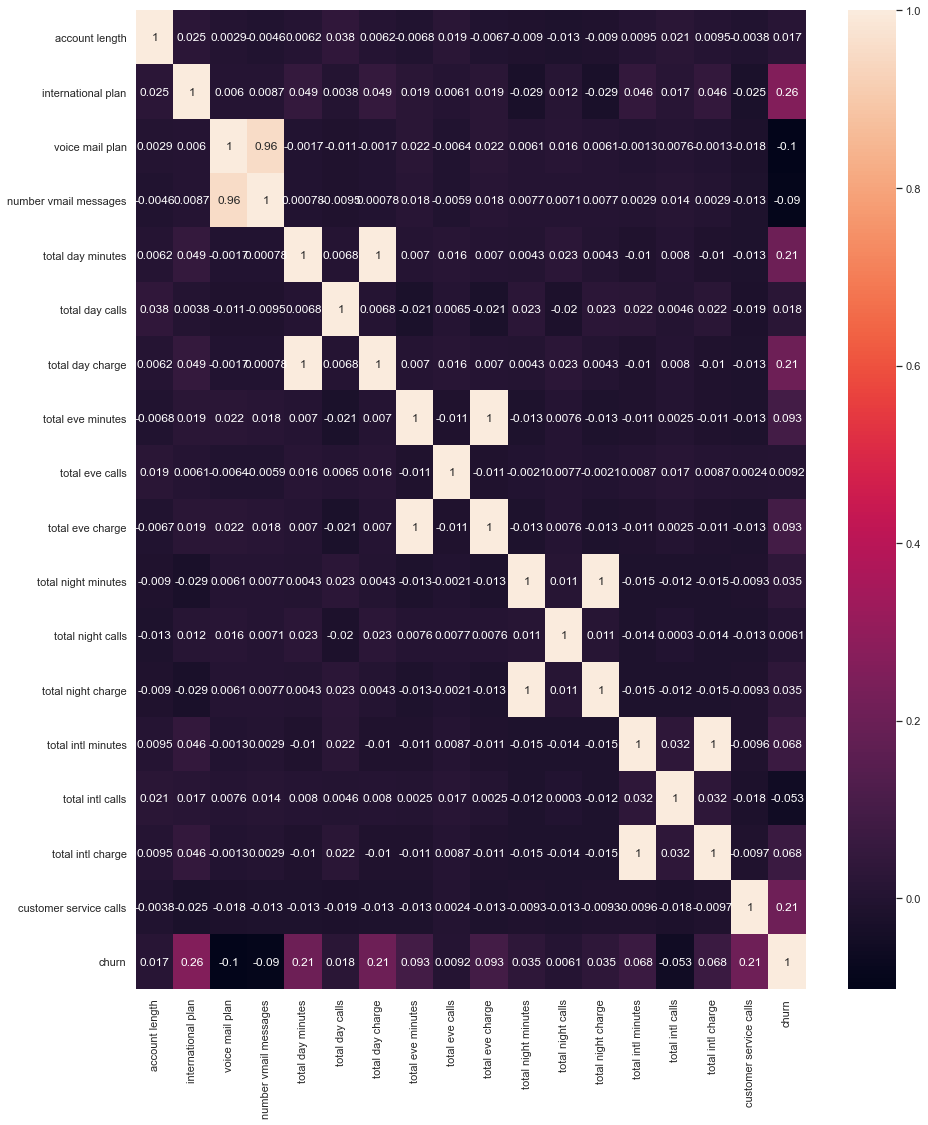

In [48]:
# Correlation heatmap for intial cleansed dataset

fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(df_clean.corr(), annot=True);

Based on this map, it appears **international plan** has the highest correlation with **churn**, which we'll be using as our target. There also appears to be a three-way tie amongst **total day minutes**, **total day charge**, and **customer service calls** for the second highest correlation to **churn**.

## BUILDING FIRST SIMPLE MODEL

In [96]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# Create model
dtc_model1 = DecisionTreeClassifier(max_depth = 2, random_state=42)

# fit the model
dtc_model1.fit(X_train, y_train)

# get importance
importance = dtc_model1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc_model1.score(X_train, y_train))
print('Testing:', dtc_model1.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.41201
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.17256
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.41543
Training: 0.8803521408563425
Testing: 0.8693045563549161


In [105]:
prediction = dtc_model1.predict(X_test)

print ('\n clasification report:\n', classification_report(y_test,prediction))


 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       712
           1       0.69      0.20      0.31       122

    accuracy                           0.87       834
   macro avg       0.78      0.59      0.62       834
weighted avg       0.85      0.87      0.84       834



In [98]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['customer service calls', 'state'], axis = 1)
y = df_clean['customer service calls']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# Create model
dtc_model_csc = DecisionTreeClassifier(max_depth = 2, random_state=42)

# fit the model
dtc_model_csc.fit(X_train, y_train)

# get importance
importance = dtc_model_csc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc_model_csc.score(X_train, y_train))
print('Testing:', dtc_model_csc.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.15523
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.37288
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.47189
Training: 0.3585434173669468
Testing: 0.3776978417266187


In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account length         3333 non-null   int64  
 1   international plan     3333 non-null   int64  
 2   voice mail plan        3333 non-null   int64  
 3   number vmail messages  3333 non-null   int64  
 4   total day minutes      3333 non-null   float64
 5   total day calls        3333 non-null   int64  
 6   total day charge       3333 non-null   float64
 7   total eve minutes      3333 non-null   float64
 8   total eve calls        3333 non-null   int64  
 9   total eve charge       3333 non-null   float64
 10  total night minutes    3333 non-null   float64
 11  total night calls      3333 non-null   int64  
 12  total night charge     3333 non-null   float64
 13  total intl minutes     3333 non-null   float64
 14  total intl calls       3333 non-null   int64  
 15  tota

In [101]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# Create model with increased max_depth
dtc_model2 = DecisionTreeClassifier(max_depth = 5, random_state=42)

# fit the model
dtc_model2.fit(X_train, y_train)

# get importance
importance = dtc_model2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc_model2.score(X_train, y_train))
print('Testing:', dtc_model2.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.09980
Feature: 2, Score: 0.05771
Feature: 3, Score: 0.01002
Feature: 4, Score: 0.20839
Feature: 5, Score: 0.00808
Feature: 6, Score: 0.10453
Feature: 7, Score: 0.09222
Feature: 8, Score: 0.00768
Feature: 9, Score: 0.04018
Feature: 10, Score: 0.01663
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00573
Feature: 13, Score: 0.10006
Feature: 14, Score: 0.08239
Feature: 15, Score: 0.00563
Feature: 16, Score: 0.16094
Training: 0.9555822328931572
Testing: 0.9280575539568345


In [51]:
# Finding X_train info to match feature numbers

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 2654 to 1061
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   int64  
 1   international plan      2499 non-null   int64  
 2   voice mail plan         2499 non-null   int64  
 3   number vmail messages   2499 non-null   int64  
 4   total day minutes       2499 non-null   float64
 5   total day calls         2499 non-null   int64  
 6   total day charge        2499 non-null   float64
 7   total eve minutes       2499 non-null   float64
 8   total eve calls         2499 non-null   int64  
 9   total eve charge        2499 non-null   float64
 10  total night minutes     2499 non-null   float64
 11  total night calls       2499 non-null   int64  
 12  total night charge      2499 non-null   float64
 13  total intl minutes      2499 non-null   float64
 14  total intl calls        2499 non-null

In [108]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# define model
dtc_model3 = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dtc_model3, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.778


In [110]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
dtc_model4 = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dtc_model4, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.742


In [113]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# fit the model
dtc_model3.fit(X_train, y_train)
dtc_model4.fit(X_train, y_train)

# get predictions for each of the 3 models
prediction1 = dtc_model1.predict(X_test)
prediction2 = dtc_model2.predict(X_test)
prediction3 = dtc_model3.predict(X_test)
prediction4 = dtc_model4.predict(X_test)

print ('\n clasification report 1:\n', classification_report(y_test,prediction1))
print ('\n clasification report 2:\n', classification_report(y_test,prediction2))
# print ('\n clasification report 3:\n', classification_report(y_test,prediction3))
print ('\n clasification report 4:\n', classification_report(y_test,prediction4))


 clasification report 1:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       712
           1       0.69      0.20      0.31       122

    accuracy                           0.87       834
   macro avg       0.78      0.59      0.62       834
weighted avg       0.85      0.87      0.84       834


 clasification report 2:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       712
           1       0.80      0.68      0.73       122

    accuracy                           0.93       834
   macro avg       0.87      0.83      0.85       834
weighted avg       0.92      0.93      0.93       834


 clasification report 4:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       712
           1       0.45      0.73      0.56       122

    accuracy                           0.83       834
   macro avg       0.70      0.79      0.73    

In [115]:
print ('\n confussion matrix 1:\n',confusion_matrix(y_test, prediction1))
print ('\n confussion matrix 2:\n',confusion_matrix(y_test, prediction2))
print ('\n confussion matrix 4:\n',confusion_matrix(y_test, prediction4))


 confussion matrix 1:
 [[701  11]
 [ 98  24]]

 confussion matrix 2:
 [[691  21]
 [ 39  83]]

 confussion matrix 4:
 [[604 108]
 [ 33  89]]


In [85]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['churn', 'state'], axis = 1)
y = df_clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# Scale the data for Logistic Regression modeling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Train a logistic regresssion model with the train data
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [86]:
# Accuracy on training data & test data
print('Training:', log_model.score(X_train_sc, y_train))
print('Testing:', log_model.score(X_test_sc, y_test))

Training: 0.8647458983593438
Testing: 0.8525179856115108


In [87]:
# get importance
importance = log_model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04127
Feature: 1, Score: 0.60009
Feature: 2, Score: -0.69465
Feature: 3, Score: 0.26217
Feature: 4, Score: 0.34857
Feature: 5, Score: 0.04154
Feature: 6, Score: 0.34928
Feature: 7, Score: 0.18115
Feature: 8, Score: 0.03497
Feature: 9, Score: 0.18113
Feature: 10, Score: 0.10804
Feature: 11, Score: -0.00478
Feature: 12, Score: 0.10634
Feature: 13, Score: 0.11609
Feature: 14, Score: -0.33082
Feature: 15, Score: 0.11968
Feature: 16, Score: 0.72131


In [88]:
predictions = log_model.predict(X_test_sc)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       712
           1       0.49      0.18      0.26       122

    accuracy                           0.85       834
   macro avg       0.68      0.57      0.59       834
weighted avg       0.82      0.85      0.82       834



In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train_sc, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 361
Before OverSampling, counts of label '0': 2138 

After OverSampling, the shape of train_X: (4276, 17)
After OverSampling, the shape of train_y: (4276,) 

After OverSampling, counts of label '1': 2138
After OverSampling, counts of label '0': 2138


In [58]:
log_model_bal = LogisticRegression()
log_model_bal.fit(X_train_res, y_train_res)
predictions = log_model_bal.predict(X_test_sc)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       712
           1       0.33      0.70      0.45       122

    accuracy                           0.75       834
   macro avg       0.64      0.73      0.65       834
weighted avg       0.85      0.75      0.78       834



In [39]:
# plot feature importance
# fig, ax = plt.subplots(figsize=(15, 18))
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = log_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [80]:
df_clean['customer service calls'].value_counts().values

array([1181,  759,  697,  429,  166,   66,   22,    9,    2,    2],
      dtype=int64)

In [73]:
csc_calls = df_clean.groupby('customer service calls').sum()
csc_calls.reset_index(drop=False, inplace=True)

In [74]:
csc_calls

,customer service calls,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,0,70608,83,193,5676,126739.3,70327,21546.13,140107.7,69770,11909.35,140946.9,69354,6342.71,7239.9,3098,1955.11,92
1,1,120202,112,344,9960,211936.3,119343,36029.75,239056.2,118254,20319.96,236393.6,118679,10637.73,11986.1,5365,3236.91,122
2,2,75312,62,215,6293,134156.1,75342,22807.02,152042.4,76194,12923.80,152518.0,76987,6863.37,7800.5,3397,2106.54,87
3,3,43515,38,98,2928,78642.8,42864,13369.41,84952.2,42390,7221.03,86780.0,42472,3905.12,4348.8,1932,1174.33,44
4,4,17042,21,42,1245,30589.2,16895,5200.25,33543.7,16948,2851.21,33050.7,16130,1487.31,1697.0,714,458.31,76
5,5,6769,6,17,479,11573.7,6568,1967.59,13073.9,6697,1111.31,12668.3,6450,570.13,698.7,292,188.67,40
6,6,1984,0,9,284,3322.2,2142,564.78,4335.6,2027,368.54,4448.1,2191,200.17,221.1,73,59.71,14
7,7,1045,0,2,69,1404.1,793,238.70,1967.8,969,167.26,1818.5,994,81.83,88.2,42,23.81,5
8,8,167,0,1,40,360.6,241,61.30,401.8,215,34.15,390.0,198,17.55,16.3,12,4.40,1
9,9,205,1,1,20,466.1,237,79.24,386.2,217,32.83,492.4,204,22.15,24.3,5,6.56,2


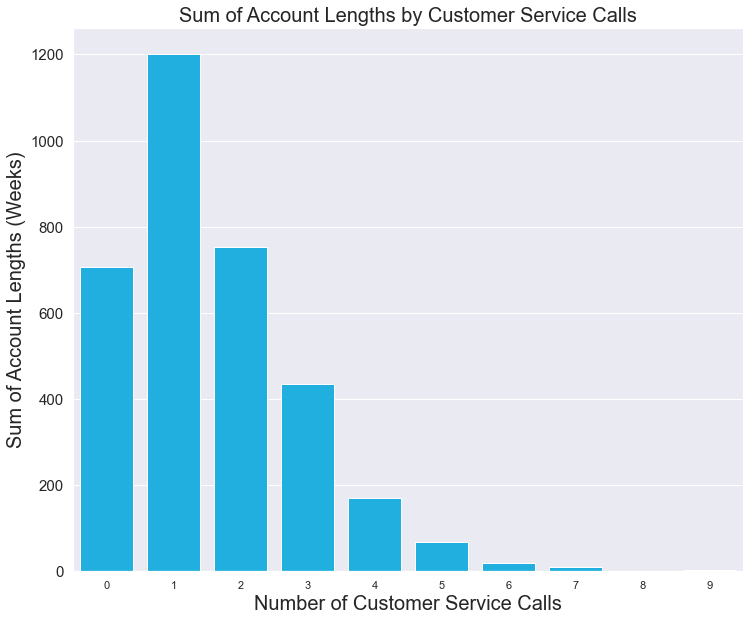

In [77]:
# Plot the Median Net Profits by Release Month
fig, ax = plt.subplots(figsize = (12 , 10))

y = csc_calls['account length'] / 100

fig = sns.barplot(data = csc_calls,
                  x = 'customer service calls',
                  y = y,
                  color = 'deepskyblue')

plt.xlabel('Number of Customer Service Calls', size=20)
#ax.set_xticklabels(ticklabels, size=15)
plt.ylabel('Sum of Account Lengths (Weeks)', size=20)
plt.yticks(fontsize=15)
plt.title('Sum of Account Lengths by Customer Service Calls', size=20)
plt.show(fig);

In [32]:
df_no_churn = df_clean[(df_clean['churn'] == 0)]
df_churn = df_clean[(df_clean['churn'] == 1)]

In [33]:
df_no_churn.shape, df_churn.shape

((2850, 19), (483, 19))

In [34]:
churn_states = df_churn.groupby('state').sum()
churn_states.reset_index(drop=False, inplace=True)

In [62]:
churn_states_topten = churn_states.sort_values(by='churn', ascending=False).head(10)

In [36]:
import plotly.express as px

In [67]:
fig = px.choropleth(churn_states,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='churn',
                    color_continuous_scale="Viridis_r",      
                    )
fig.update_layout(
      title_text = 'Total Number of Customer Churn by State',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [28]:
fig = px.choropleth(churn_states,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='total day charge',
                    color_continuous_scale="Viridis_r",      
                    )
fig.update_layout(
      title_text = 'Total Day Charges ($) for Churned Customers by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [36]:
df_churn['international plan'].value_counts(normalize=True)

0    0.716356
1    0.283644
Name: international plan, dtype: float64

In [38]:
# Separate data into feature and target DataFrames
X = df_clean.drop(columns = ['state', 'customer service calls'], axis = 1)
y = df_clean['customer service calls']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# Create model
dtc_model = DecisionTreeClassifier(max_depth = 2, random_state=42)

# fit the model
dtc_model.fit(X_train, y_train)

# get importance
importance = dtc_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc_model.score(X_train, y_train))
print('Testing:', dtc_model.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.15523
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.37288
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.47189
Training: 0.3585434173669468
Testing: 0.3776978417266187


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account length         3333 non-null   int64  
 1   international plan     3333 non-null   int64  
 2   voice mail plan        3333 non-null   int64  
 3   number vmail messages  3333 non-null   int64  
 4   total day minutes      3333 non-null   float64
 5   total day calls        3333 non-null   int64  
 6   total day charge       3333 non-null   float64
 7   total eve minutes      3333 non-null   float64
 8   total eve calls        3333 non-null   int64  
 9   total eve charge       3333 non-null   float64
 10  total night minutes    3333 non-null   float64
 11  total night calls      3333 non-null   int64  
 12  total night charge     3333 non-null   float64
 13  total intl minutes     3333 non-null   float64
 14  total intl calls       3333 non-null   int64  
 15  tota